# Classification with stumbleupon data

Project 4 has been changed since scraping was untenable. The project now focuses on the stumbleupon kaggle dataset. For more information on this dataset, [check out the website here](https://www.kaggle.com/c/stumbleupon).

---

## 1. Load in the dataset

This is the only part completed for you.

---

In [100]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cross_validation import train_test_split
sns.set_style('dark')

%matplotlib inline

In [2]:
su = pd.read_csv('../dataset/evergreen.tsv', delimiter='\t', encoding='utf-8')

In [3]:
su.news_front_page.value_counts()

0    5853
?    1248
1     294
Name: news_front_page, dtype: int64

## 2. Clean up/examine your data

Some of the columns may have values that need changing or that are of the wrong type. There could also be columns that aren't very useful.

---

In [4]:
print su.columns.values
su.head(1)

[u'url' u'urlid' u'boilerplate' u'alchemy_category'
 u'alchemy_category_score' u'avglinksize' u'commonlinkratio_1'
 u'commonlinkratio_2' u'commonlinkratio_3' u'commonlinkratio_4'
 u'compression_ratio' u'embed_ratio' u'framebased' u'frameTagRatio'
 u'hasDomainLink' u'html_ratio' u'image_ratio' u'is_news'
 u'lengthyLinkDomain' u'linkwordscore' u'news_front_page'
 u'non_markup_alphanum_characters' u'numberOfLinks' u'numwords_in_url'
 u'parametrizedLinkRatio' u'spelling_errors_ratio' u'label']


,url,urlid,boilerplate,alchemy_category,alchemy_category_score,avglinksize,commonlinkratio_1,commonlinkratio_2,commonlinkratio_3,commonlinkratio_4,...,is_news,lengthyLinkDomain,linkwordscore,news_front_page,non_markup_alphanum_characters,numberOfLinks,numwords_in_url,parametrizedLinkRatio,spelling_errors_ratio,label
0,http://www.bloomberg.com/news/2010-12-23/ibm-p...,4042,"{""title"":""IBM Sees Holographic Calls Air Breat...",business,0.789131,2.055556,0.676471,0.205882,0.047059,0.023529,...,1,1,24,0,5424,170,8,0.152941,0.07913,0


In [5]:
su.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7395 entries, 0 to 7394
Data columns (total 27 columns):
url                               7395 non-null object
urlid                             7395 non-null int64
boilerplate                       7395 non-null object
alchemy_category                  7395 non-null object
alchemy_category_score            7395 non-null object
avglinksize                       7395 non-null float64
commonlinkratio_1                 7395 non-null float64
commonlinkratio_2                 7395 non-null float64
commonlinkratio_3                 7395 non-null float64
commonlinkratio_4                 7395 non-null float64
compression_ratio                 7395 non-null float64
embed_ratio                       7395 non-null float64
framebased                        7395 non-null int64
frameTagRatio                     7395 non-null float64
hasDomainLink                     7395 non-null int64
html_ratio                        7395 non-null float64
image_r

In [6]:
#check to see which object columns are corrupt
object_cols = []
for i in su.columns:
    if su[i].dtype == object:
       # print i
        object_cols.append(i)

print object_cols
su[object_cols].head(1)


[u'url', u'boilerplate', u'alchemy_category', u'alchemy_category_score', u'is_news', u'news_front_page']


,url,boilerplate,alchemy_category,alchemy_category_score,is_news,news_front_page
0,http://www.bloomberg.com/news/2010-12-23/ibm-p...,"{""title"":""IBM Sees Holographic Calls Air Breat...",business,0.789131,1,0


In [7]:
print su['alchemy_category'].value_counts() 
#check to see which categories there are, 6 unknown but 2342 ?,change the 2342 ? to unknown

?                     2342
recreation            1229
arts_entertainment     941
business               880
health                 506
sports                 380
culture_politics       343
computer_internet      296
science_technology     289
gaming                  76
religion                72
law_crime               31
unknown                  6
weather                  4
Name: alchemy_category, dtype: int64


In [8]:
su.is_news.value_counts()

1    4552
?    2843
Name: is_news, dtype: int64

In [9]:
# change all ? in the number columns to NaN values in the columns where there are ?
for i in object_cols:
    if i == 'is_news':    # change is_news ? to be 0 since there are no 0's and kaggle said that they can only be 1, 0
        su[i] = su[i].apply(lambda x: 0 if x == '?' else x)    
    else:
        su[i] = su[i].apply(lambda x: np.nan if x == '?' else x)

su['alchemy_category'] = su['alchemy_category'].fillna('unknown')

In [10]:
su.alchemy_category.value_counts()

unknown               2348
recreation            1229
arts_entertainment     941
business               880
health                 506
sports                 380
culture_politics       343
computer_internet      296
science_technology     289
gaming                  76
religion                72
law_crime               31
weather                  4
Name: alchemy_category, dtype: int64

In [11]:
su.head()
su.alchemy_category_score = su.alchemy_category_score.apply(lambda x: float(x))
#change alchemy category score to float

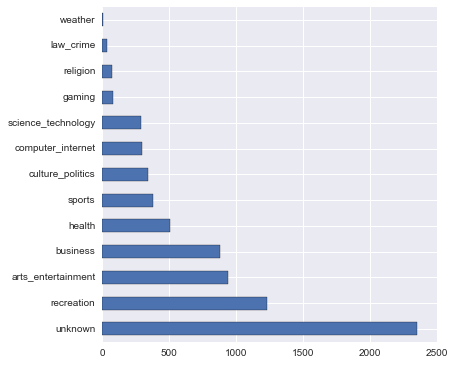

In [12]:
sns.set(rc={"figure.figsize": (6, 6)})
su.alchemy_category.value_counts().plot(kind = 'barh')

False    5053
True     2342
Name: alchemy_category_score, dtype: int64
count    5053.000000
mean        0.603334
std         0.212864
min         0.070833
25%         0.452424
50%         0.625616
75%         0.780851
max         0.999426
Name: alchemy_category_score, dtype: float64
median 0.625616


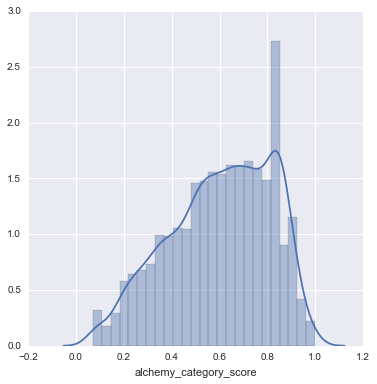

In [13]:
print su.alchemy_category_score.isnull().value_counts()
print su.alchemy_category_score.describe()
print 'median', su.alchemy_category_score.median()
sns.distplot(su[~su.alchemy_category_score.isnull()].alchemy_category_score)



0.6022903188027942

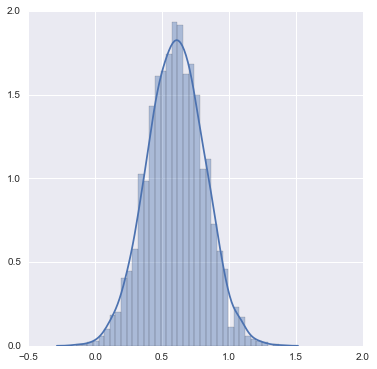

In [14]:
# create normal distribution with mean and std deviation so it has noise and add that to the data
# mean 0.603334, std 0.212864   2342 values total
# do this to not inflate distribution with the whole mean

mu = 0.603334
s = 0.212864
size = 2342
np.random.seed(5)
normal_alchemy_score = pd.Series(np.random.normal(mu,s,size))
sns.distplot(normal_alchemy_score)
normal_alchemy_score.mean()

In [15]:
su.ix[su.alchemy_category_score.isnull(), 'alchemy_category_score'] = normal_alchemy_score.values
print su.alchemy_category_score.isnull().value_counts()

False    7395
Name: alchemy_category_score, dtype: int64


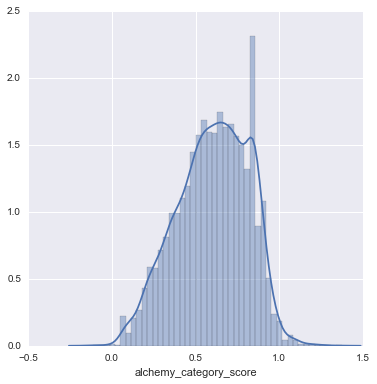

In [16]:
sns.distplot(su.alchemy_category_score)

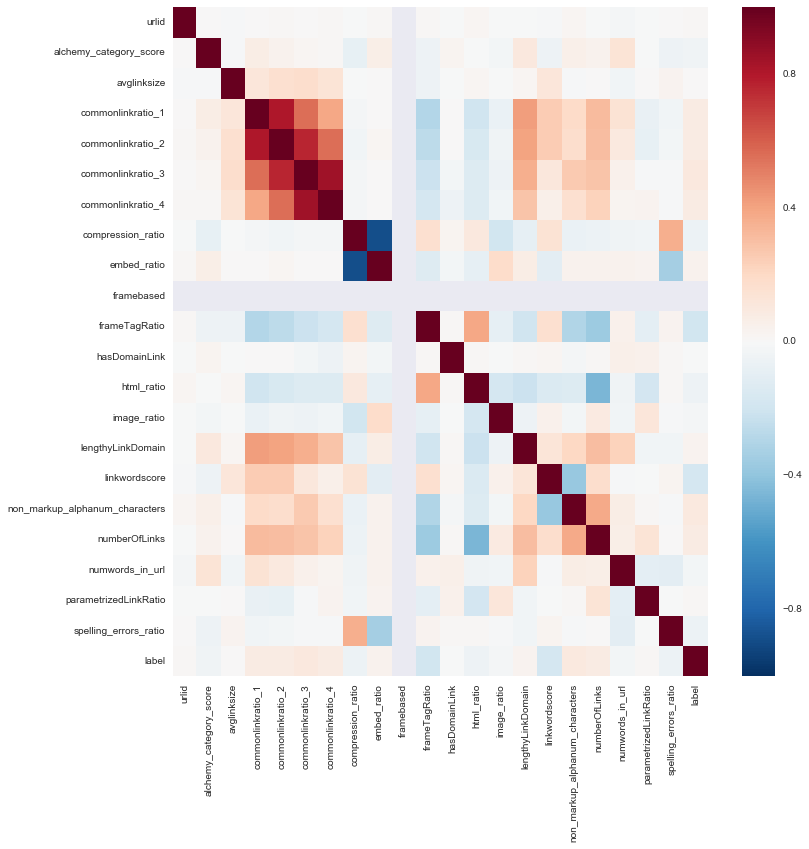

In [17]:
sns.set(rc={"figure.figsize": (12, 12)})
sns.heatmap(su.corr())

In [18]:
su.label.value_counts()  # ratio of evergreen to not evergreen

1    3796
0    3599
Name: label, dtype: int64

In [19]:
#sns.pairplot(su_scale_normal)

## 3. Use statsmodels' logistic regression function to look at variable significance

The **`import statsmodels.formula.api as smf`** code below gives us access to a statsmodels api that can run logistic regressions using patsy-style formulas.

Ex:

```python
formula = 'target ~ var1 + var2 + C(var3) -1'
logreg = smf.logit(formula, data=data)
logreg_results = logreg.fit()
print logreg_results.summary()
```

---

In [20]:
import statsmodels.formula.api as smf
formula = 'label ~ alchemy_category_score + frameTagRatio + html_ratio + image_ratio + compression_ratio'
logreg = smf.logit(formula, data = su)
logreg_results = logreg.fit()
print logreg_results.summary()

Optimization terminated successfully.
         Current function value: 0.670765
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                  label   No. Observations:                 7395
Model:                          Logit   Df Residuals:                     7389
Method:                           MLE   Df Model:                            5
Date:                Wed, 18 May 2016   Pseudo R-squ.:                 0.03179
Time:                        11:10:14   Log-Likelihood:                -4960.3
converged:                       True   LL-Null:                       -5123.2
                                        LLR p-value:                 2.861e-68
                             coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------------------
Intercept                  0.8484      0.136      6.256      0.000         0.583    

In [21]:
su.shape

(7395, 27)

In [22]:
#### ALL VARIABLES
formula = 'label ~  alchemy_category_score + avglinksize + commonlinkratio_1 \
         + commonlinkratio_2 + commonlinkratio_3 + commonlinkratio_4 + compression_ratio + embed_ratio \
         + frameTagRatio + hasDomainLink+html_ratio + is_news + image_ratio + lengthyLinkDomain + linkwordscore\
         + news_front_page + non_markup_alphanum_characters + numberOfLinks \
         + numwords_in_url+parametrizedLinkRatio+spelling_errors_ratio + news_front_page -1'

logreg = smf.logit(formula, data = su)
logreg_results = logreg.fit()
print logreg_results.summary()

Optimization terminated successfully.
         Current function value: 0.645454
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:                  label   No. Observations:                 6147
Model:                          Logit   Df Residuals:                     6125
Method:                           MLE   Df Model:                           21
Date:                Wed, 18 May 2016   Pseudo R-squ.:                 0.06804
Time:                        11:10:15   Log-Likelihood:                -3967.6
converged:                       True   LL-Null:                       -4257.3
                                        LLR p-value:                3.465e-109
                                     coef    std err          z      P>|z|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------------------------
is_news[0]                         1.7400      0.219      7.951     

In [23]:
#su.describe().T

In [24]:
from sklearn.preprocessing import StandardScaler
print StandardScaler(su.frameTagRatio)

StandardScaler(copy=0       0.090774
1       0.098707
2       0.072448
3       0.095861
4       0.024908
5       0.019841
6       0.039568
7       0.026616
8       0.021705
9       0.012000
10      0.056497
11      0.162690
12      0.074576
13      0.057692
14      0.078431
15      0.054993
16      0.157576
17    ...1    0.057377
7392    0.124122
7393    0.097778
7394    0.028451
Name: frameTagRatio, dtype: float64,
        with_mean=True, with_std=True)


In [25]:
su.columns.values

array([u'url', u'urlid', u'boilerplate', u'alchemy_category',
       u'alchemy_category_score', u'avglinksize', u'commonlinkratio_1',
       u'commonlinkratio_2', u'commonlinkratio_3', u'commonlinkratio_4',
       u'compression_ratio', u'embed_ratio', u'framebased',
       u'frameTagRatio', u'hasDomainLink', u'html_ratio', u'image_ratio',
       u'is_news', u'lengthyLinkDomain', u'linkwordscore',
       u'news_front_page', u'non_markup_alphanum_characters',
       u'numberOfLinks', u'numwords_in_url', u'parametrizedLinkRatio',
       u'spelling_errors_ratio', u'label'], dtype=object)

### 3.1 Run a logistic regression predicting evergreen from the numeric columns

And print out the results as shown in the example above.

---

In [26]:
#su.head()

In [27]:
## EVERGREEN FROM NUMERIC COLS

from sklearn.linear_model import LogisticRegression
from sklearn import cross_validation
import patsy

numeric_cols = [c for c in su if su[c].dtype == float ]
print numeric_cols
formula = 'label ~ alchemy_category_score + avglinksize+ commonlinkratio_1 + commonlinkratio_2 \
+ commonlinkratio_3 + commonlinkratio_4 + compression_ratio + embed_ratio + frameTagRatio\
+ html_ratio + image_ratio + parametrizedLinkRatio + spelling_errors_ratio'


y_mat, x_mat = patsy.dmatrices(formula, data = su)

x_train, x_test, y_train, y_test = cross_validation.train_test_split(x_mat,y_mat, test_size = .33)
logreg = LogisticRegression()
logreg = logreg.fit(x_train, np.ravel(y_train))

y_pred = logreg.predict(x_test)
print logreg.score(x_test,y_test)

[u'alchemy_category_score', u'avglinksize', u'commonlinkratio_1', u'commonlinkratio_2', u'commonlinkratio_3', u'commonlinkratio_4', u'compression_ratio', u'embed_ratio', u'frameTagRatio', u'html_ratio', u'image_ratio', u'parametrizedLinkRatio', u'spelling_errors_ratio']
0.576403113478


In [28]:
x_mat

DesignMatrix with shape (7395, 14)
  Columns:
    ['Intercept',
     'alchemy_category_score',
     'avglinksize',
     'commonlinkratio_1',
     'commonlinkratio_2',
     'commonlinkratio_3',
     'commonlinkratio_4',
     'compression_ratio',
     'embed_ratio',
     'frameTagRatio',
     'html_ratio',
     'image_ratio',
     'parametrizedLinkRatio',
     'spelling_errors_ratio']
  Terms:
    'Intercept' (column 0)
    'alchemy_category_score' (column 1)
    'avglinksize' (column 2)
    'commonlinkratio_1' (column 3)
    'commonlinkratio_2' (column 4)
    'commonlinkratio_3' (column 5)
    'commonlinkratio_4' (column 6)
    'compression_ratio' (column 7)
    'embed_ratio' (column 8)
    'frameTagRatio' (column 9)
    'html_ratio' (column 10)
    'image_ratio' (column 11)
    'parametrizedLinkRatio' (column 12)
    'spelling_errors_ratio' (column 13)
  (to view full data, use np.asarray(this_obj))

### 3.2 Run a logistic regression predicting evergreen from the numeric columns and a categorical variable of alchemy_category

And print out the results as shown in the example.

---

In [29]:
# EVER GREEN FROM NUMERIC AND ALCHEMY_CATEGORY

from sklearn.linear_model import LogisticRegression
from sklearn import cross_validation
import patsy


formula = 'label ~ alchemy_category_score + C(alchemy_category) + avglinksize+ commonlinkratio_1\
+ commonlinkratio_2 + commonlinkratio_3 + commonlinkratio_4 + compression_ratio + embed_ratio + frameTagRatio\
+ html_ratio + image_ratio + parametrizedLinkRatio + spelling_errors_ratio - 1'


y_mat, x_mat = patsy.dmatrices(formula, data = su)

x_train, x_test, y_train, y_test = cross_validation.train_test_split(x_mat,y_mat, test_size = .33)
logreg = LogisticRegression()
logreg = logreg.fit(x_train, np.ravel(y_train))

y_pred = logreg.predict(x_test)
print logreg.score(x_test,y_test)


0.626792298238


In [30]:
# EVER GREEN FROM NUMERIC AND ALCHEMY_CATEGORY and is_news category

from sklearn.linear_model import LogisticRegression
from sklearn import cross_validation
import patsy


formula = 'label ~ alchemy_category_score + C(alchemy_category) + C(is_news) + avglinksize+ commonlinkratio_1\
+ commonlinkratio_2 + commonlinkratio_3 + commonlinkratio_4 + compression_ratio + embed_ratio + frameTagRatio\
+ html_ratio + image_ratio + parametrizedLinkRatio + spelling_errors_ratio'


y_mat, x_mat = patsy.dmatrices(formula, data = su)

x_train, x_test, y_train, y_test = cross_validation.train_test_split(x_mat,y_mat, test_size = .33)
logreg = LogisticRegression()
logreg = logreg.fit(x_train, np.ravel(y_train))

y_pred = logreg.predict(x_test)
print logreg.score(x_test,y_test)



0.642359688652


## 4. Use sklearn to cross-validate the accuracy of the model above

Normalize the numeric and categorical columns of the predictor matrix.

---

In [83]:

# normalized data
numeric_cols = [c for c in su if su[c].dtype == float ]


su_scale = su[numeric_cols]

su_scale_normal = (su_scale - su_scale.mean()) / su_scale.std()
su_scale_normal['label'] = su.label
su_scale_normal['alchemy_category'] = su.alchemy_category
su_scale_normal['is_news'] = su.is_news
su_scale_normal['news_front_page'] = su.news_front_page
su_scale_normal['hasDomainLink'] = su.hasDomainLink
su_scale_normal['lengthyLinkDomain'] = su.lengthyLinkDomain
su_scale_normal.head()



,alchemy_category_score,avglinksize,commonlinkratio_1,commonlinkratio_2,commonlinkratio_3,commonlinkratio_4,compression_ratio,embed_ratio,frameTagRatio,html_ratio,image_ratio,parametrizedLinkRatio,spelling_errors_ratio,label,alchemy_category,is_news,news_front_page,hasDomainLink,lengthyLinkDomain
0,0.876178,-0.081936,1.025140,-0.055864,-0.468893,-0.354305,-0.317535,0.338451,0.828822,0.229640,-0.141626,-0.108698,-0.278821,0,business,1,0,0,1
1,-0.135840,0.106284,0.195886,0.508987,1.269469,1.309714,-0.313176,0.338451,1.020244,-0.577072,-0.097460,0.048853,0.305780,1,recreation,1,0,0,1
2,1.852471,-0.043962,0.461692,0.733430,0.292698,-0.091238,-0.303219,0.338451,0.386654,-0.140539,-0.080848,-0.033813,-0.550387,1,health,1,0,0,1
3,0.933217,-0.141386,-0.335890,-0.777414,-0.785550,-0.678274,-0.311059,0.338451,0.951555,0.607347,-0.125235,-0.715808,-0.004574,1,health,1,0,0,0
4,0.546781,-0.009902,0.156397,0.055487,0.327100,-0.083332,-0.317121,0.338451,-0.760377,-0.093184,-0.117352,-0.404279,-0.235413,0,sports,1,0,0,1


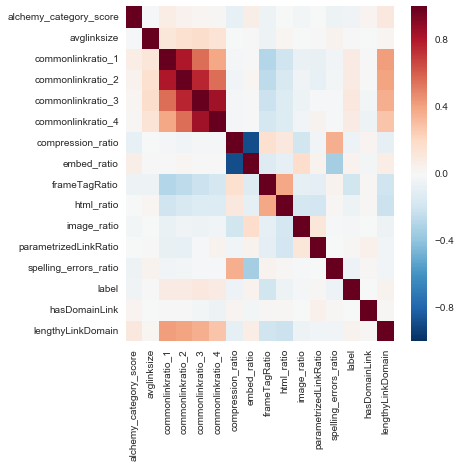

In [84]:
sns.heatmap(su_scale_normal.corr())

In [102]:
#normalized numerical and some categorical
formula = 'label ~ alchemy_category_score + C(alchemy_category) + avglinksize+ commonlinkratio_1\
+ commonlinkratio_2 + commonlinkratio_3 + commonlinkratio_4 + compression_ratio + embed_ratio + frameTagRatio\
+ html_ratio + image_ratio + parametrizedLinkRatio + spelling_errors_ratio'


y_mat, x_mat = patsy.dmatrices(formula, data = su_scale_normal)

x_train, x_test, y_train, y_test = cross_validation.train_test_split(x_mat,y_mat, test_size = .33)
logreg = LogisticRegression()
logreg = logreg.fit(x_train, np.ravel(y_train))

y_pred = logreg.predict(x_test)
print logreg.score(x_test,y_test)


0.642359688652


In [103]:
#normalized numerical and some categorical but added is_news + news_front_page
formula = 'label ~ alchemy_category_score + C(alchemy_category) + avglinksize+ commonlinkratio_1\
+ commonlinkratio_2 + commonlinkratio_3 + commonlinkratio_4 + compression_ratio + embed_ratio + frameTagRatio\
+ html_ratio + image_ratio + parametrizedLinkRatio + spelling_errors_ratio + C(is_news) + C(news_front_page)' 


y_mat, x_mat = patsy.dmatrices(formula, data = su_scale_normal)

x_train, x_test, y_train, y_test = cross_validation.train_test_split(x_mat,y_mat, test_size = .33)
logreg = LogisticRegression()
logreg = logreg.fit(x_train, np.ravel(y_train))

y_pred = logreg.predict(x_test)
print logreg.score(x_test,y_test)

0.66732380483


In [101]:
#normalized numerical and some categorical but added is_news + news_front_page + add rest categorical variables
formula = 'label ~ alchemy_category_score + C(alchemy_category) + avglinksize+ commonlinkratio_1\
+ commonlinkratio_2 + commonlinkratio_3 + commonlinkratio_4 + compression_ratio + embed_ratio + frameTagRatio\
+ html_ratio + image_ratio + parametrizedLinkRatio + spelling_errors_ratio + C(is_news) + C(news_front_page)\
+ C(hasDomainLink) + C(lengthyLinkDomain) - 1' 


y_mat, x_mat = patsy.dmatrices(formula, data = su_scale_normal)

x_train, x_test, y_train, y_test = cross_validation.train_test_split(x_mat,y_mat, test_size = .33)
logreg = LogisticRegression()
logreg = logreg.fit(x_train, np.ravel(y_train))

y_pred = logreg.predict(x_test)
print logreg.score(x_test,y_test)

0.66338097585


In [87]:
su.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7395 entries, 0 to 7394
Data columns (total 27 columns):
url                               7395 non-null object
urlid                             7395 non-null int64
boilerplate                       7395 non-null object
alchemy_category                  7395 non-null object
alchemy_category_score            7395 non-null float64
avglinksize                       7395 non-null float64
commonlinkratio_1                 7395 non-null float64
commonlinkratio_2                 7395 non-null float64
commonlinkratio_3                 7395 non-null float64
commonlinkratio_4                 7395 non-null float64
compression_ratio                 7395 non-null float64
embed_ratio                       7395 non-null float64
framebased                        7395 non-null int64
frameTagRatio                     7395 non-null float64
hasDomainLink                     7395 non-null int64
html_ratio                        7395 non-null float64
image_

## 5. Gridsearch regularization parameters for logistic regression

Find the best regularization type (Ridge, Lasso) across a set of regularization strengths.

[NOTE: C is the inverse of the regularization strength. Lower C values are stronger regularization. Having a C higher than 1 will significantly slow down the search. I'm not particularly interested in values over 1, since this is the default regularization strength in LogisticRegression.]

**After you find the best set of parameters, build a Logistic Regression with those parameters and crossvalidate the score.**

[NOTE 2: to run Lasso regularization the solver should be `'liblinear'`]

---

In [88]:
#Ridge
from sklearn.linear_model import Ridge
def ridge_coefs(X, Y, alphas):
    
    # set up the list to hold the different sets of coefficients:
    coefs = []
    
    # Set up a ridge regression object
    ridge_reg = Ridge()
    
    # Iterate through the alphas fed into the function:
    for a in alphas:
        
        # On each alpha reset the ridge model's alpha to the current one:
        ridge_reg.set_params(alpha=a)
        
        # fit or refit the model on the provided X, Y
        ridge_reg.fit(X, Y)
        
        # Get out the coefficient list (first element of the .coef_ attribute)
        coefs.append(ridge_reg.coef_[0])
        
    return coefs
l_alphas = (.1,.5,1)
ridge_coefs(x_mat,y_mat,l_alphas)



[array([ -7.18408993e-02,   2.48392419e-01,  -1.69464831e-01,
         -1.25866561e-04,  -8.64341325e-02,   1.29426410e-01,
          4.17100549e-02,   2.31692794e-01,  -6.21259622e-03,
          1.32517871e-03,  -2.26841989e-01,   4.64324632e-02,
         -1.38059005e-01,   3.24509464e-02,  -1.08250663e-01,
         -1.79818648e-02,  -2.03991416e-02,  -1.37604265e-02,
         -3.06405005e-03,   4.88976074e-03,  -2.64722289e-02,
          6.68949337e-02,  -2.09655995e-02,  -3.45501030e-02,
         -2.15963614e-02,  -8.80835609e-02,   6.84694336e-03,
         -1.04504913e-02,  -7.57311135e-04,  -2.52106969e-02]),
 array([-0.07278344,  0.24729522, -0.17018768, -0.00110283, -0.08692364,
         0.128349  ,  0.04015663,  0.23063003, -0.0071372 ,  0.00035629,
        -0.22755653,  0.04545049, -0.12654634,  0.03243085, -0.1080771 ,
        -0.01786289, -0.02038699, -0.01377293, -0.00306818,  0.00488816,
        -0.02646878,  0.06688556, -0.02095751, -0.03456502, -0.02158636,
        -0.08

In [89]:
# Lasso
from sklearn.linear_model import Lasso
def lasso_coefs(X,Y , alphas):
    coefs = []
    lasso_reg = Lasso()
    for a in alphas:
        lasso_reg.set_params(alpha=a)
        lasso_reg.fit(X, Y)
        coefs.append(lasso_reg.coef_)
        
    return coefs

l_alphas = (0.01,0.02)
lasso_coefs(x_mat,y_mat,l_alphas)

[array([-0.02685253,  0.1544188 , -0.        , -0.        , -0.        ,
         0.        ,  0.        ,  0.15620021, -0.        , -0.        ,
        -0.08208783,  0.        , -0.        ,  0.        , -0.        ,
         0.        , -0.        , -0.00857304, -0.        ,  0.        ,
         0.        ,  0.02167608,  0.        , -0.        ,  0.        ,
        -0.07911214,  0.        , -0.00225344, -0.        , -0.02097818]),
 array([-0.        ,  0.06799156, -0.        , -0.        , -0.        ,
         0.        , -0.        ,  0.09107236, -0.        , -0.        ,
        -0.        ,  0.        , -0.        ,  0.        , -0.        ,
         0.        , -0.        , -0.00354171, -0.        ,  0.        ,
         0.        ,  0.01391503,  0.        , -0.        ,  0.        ,
        -0.07364391, -0.        , -0.        , -0.        , -0.01049691])]

## 6. Gridsearch neighbors for kNN

Find the best number of neighbors with your predictors to predict the `label` target variable.

Start by bulding a kNN model with a set number of neighbors, then use gridsearch to run through a series of neighbors.

---

In [90]:

formula = 'label ~ alchemy_category_score + C(alchemy_category) + avglinksize+ commonlinkratio_1\
+ commonlinkratio_2 + commonlinkratio_3 + commonlinkratio_4 + compression_ratio + embed_ratio\
+ frameTagRatio + html_ratio + image_ratio + parametrizedLinkRatio + spelling_errors_ratio'

y_mat, x_mat = patsy.dmatrices(formula, data = su_scale_normal)


search_parameters = {
    'n_neighbors':  [3,50], 
    'weights':      ("uniform", "distance"),
    'algorithm':    ("ball_tree", "kd_tree", "brute", "auto"),
    'p':            [1,2]
}
from sklearn import svm, grid_search, datasets
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
clf = grid_search.GridSearchCV(knn, search_parameters)

no_labels = [col for col in su_scale_normal.columns if col != 'label']

su_scale_normal_nolabel = su_scale_normal[no_labels]

clf.fit(x_mat, su_scale_normal['label'])

print "Best Estimator:", clf.best_estimator_.n_neighbors
print "Best Params:", clf.best_params_
print "Best Score:", clf.best_score_

KeyboardInterrupt: 

In [ ]:
x_mat

## 7. Choose a new target from alchemy_category to predict with logistic regression

**Ideally your category choice will have a small fraction of the total rows, but not TOO small!**

---

### 7.1 Chose your target category, create the Y vector, and check the fraction of instances

---

In [112]:
su.alchemy_category.value_counts()
su_rec = su
su_rec.alchemy_category = su_rec.alchemy_category.apply(lambda x: 1 if x == 'recreation' else 0)

In [114]:
su_rec.shape
su_rec

,url,urlid,boilerplate,alchemy_category,alchemy_category_score,avglinksize,commonlinkratio_1,commonlinkratio_2,commonlinkratio_3,commonlinkratio_4,...,is_news,lengthyLinkDomain,linkwordscore,news_front_page,non_markup_alphanum_characters,numberOfLinks,numwords_in_url,parametrizedLinkRatio,spelling_errors_ratio,label
0,http://www.bloomberg.com/news/2010-12-23/ibm-p...,4042,"{""title"":""IBM Sees Holographic Calls Air Breat...",0,0.789131,2.055556,0.676471,0.205882,0.047059,0.023529,...,1,1,24,0,5424,170,8,0.152941,0.079130,0
1,http://www.popsci.com/technology/article/2012-...,8471,"{""title"":""The Fully Electronic Futuristic Star...",1,0.574147,3.677966,0.508021,0.288770,0.213904,0.144385,...,1,1,40,0,4973,187,9,0.181818,0.125448,1
2,http://www.menshealth.com/health/flu-fighting-...,1164,"{""title"":""Fruits that Fight the Flu fruits tha...",0,0.996526,2.382883,0.562016,0.321705,0.120155,0.042636,...,1,1,55,0,2240,258,11,0.166667,0.057613,1
3,http://www.dumblittleman.com/2007/12/10-foolpr...,6684,"{""title"":""10 Foolproof Tips for Better Sleep ""...",0,0.801248,1.543103,0.400000,0.100000,0.016667,0.000000,...,1,0,24,0,2737,120,5,0.041667,0.100858,1
4,http://bleacherreport.com/articles/1205138-the...,9006,"{""title"":""The 50 Coolest Jerseys You Didn t Kn...",0,0.719157,2.676471,0.500000,0.222222,0.123457,0.043210,...,1,1,14,0,12032,162,10,0.098765,0.082569,0
5,http://www.conveniencemedical.com/genital-herp...,7018,"{""url"":""conveniencemedical genital herpes home...",0,0.697255,119.000000,0.745455,0.581818,0.290909,0.018182,...,0,0,12,NaN,4368,55,3,0.054545,0.087356,0
6,http://gofashionlane.blogspot.tw/2012/06/ameri...,8685,"{""title"":""fashion lane American Wild Child "",""...",0,0.221110,0.773810,0.215054,0.053763,0.043011,0.043011,...,1,0,21,0,1287,93,3,0.548387,0.064327,1
7,http://www.insidershealth.com/article/racing_f...,3402,"{""url"":""insidershealth article racing for reco...",0,0.532904,1.883333,0.719697,0.265152,0.113636,0.015152,...,0,0,5,NaN,27656,132,4,0.068182,0.148551,0
8,http://www.valetmag.com/the-handbook/features/...,477,"{""title"":""Valet The Handbook 31 Days 31 days"",...",0,1.120758,0.471503,0.190722,0.036082,0.000000,0.000000,...,1,0,17,0,2471,194,7,0.644330,0.125000,1
9,http://www.howsweeteats.com/2010/03/24/cookies...,6731,"{""url"":""howsweeteats 2010 03 24 cookies and cr...",0,0.549673,2.410112,0.469325,0.101227,0.018405,0.003067,...,0,1,14,NaN,11459,326,4,0.236196,0.094412,1


### 7.2 Use patsy to create an X matrix of the numeric predictors and all two-way interactions between them

Ex:

```python
import patsy

formula_interactions = '~ (var1 + var2 + var3)**2 -1'
X_interactions = patsy.dmatrix(formula_interactions, data=data
```

Get the column names from the `design_info` property of the patsy X matrix.

---

In [115]:
import patsy
formula_interactions = '~ (alchemy_category_score + avglinksize+ commonlinkratio_1\
+ commonlinkratio_2 + commonlinkratio_3 + commonlinkratio_4 + compression_ratio + embed_ratio\
+ frameTagRatio + html_ratio + image_ratio + parametrizedLinkRatio + spelling_errors_ratio) ** 2 - 1'
X_interactions = patsy.dmatrix(formula_interactions, data = su_rec)
X_interactions.design_info.column_names

# to the second power makes a matrix every combination of eachother

['alchemy_category_score',
 'avglinksize',
 'commonlinkratio_1',
 'commonlinkratio_2',
 'commonlinkratio_3',
 'commonlinkratio_4',
 'compression_ratio',
 'embed_ratio',
 'frameTagRatio',
 'html_ratio',
 'image_ratio',
 'parametrizedLinkRatio',
 'spelling_errors_ratio',
 'alchemy_category_score:avglinksize',
 'alchemy_category_score:commonlinkratio_1',
 'alchemy_category_score:commonlinkratio_2',
 'alchemy_category_score:commonlinkratio_3',
 'alchemy_category_score:commonlinkratio_4',
 'alchemy_category_score:compression_ratio',
 'alchemy_category_score:embed_ratio',
 'alchemy_category_score:frameTagRatio',
 'alchemy_category_score:html_ratio',
 'alchemy_category_score:image_ratio',
 'alchemy_category_score:parametrizedLinkRatio',
 'alchemy_category_score:spelling_errors_ratio',
 'avglinksize:commonlinkratio_1',
 'avglinksize:commonlinkratio_2',
 'avglinksize:commonlinkratio_3',
 'avglinksize:commonlinkratio_4',
 'avglinksize:compression_ratio',
 'avglinksize:embed_ratio',
 'avglinksize

### 7.3 Normalize the predictor matrix columns

---

In [129]:
su_rec_norm = su_rec[[col for col in su_scale_normal if col not in 'alchemy_category']]
su_rec_norm.head()

,alchemy_category_score,avglinksize,commonlinkratio_1,commonlinkratio_2,commonlinkratio_3,commonlinkratio_4,compression_ratio,embed_ratio,frameTagRatio,html_ratio,image_ratio,parametrizedLinkRatio,spelling_errors_ratio,label,is_news,news_front_page,hasDomainLink,lengthyLinkDomain
0,0.789131,2.055556,0.676471,0.205882,0.047059,0.023529,0.443783,0.0,0.090774,0.245831,0.003883,0.152941,0.079130,0,1,0,0,1
1,0.574147,3.677966,0.508021,0.288770,0.213904,0.144385,0.468649,0.0,0.098707,0.203490,0.088652,0.181818,0.125448,1,1,0,0,1
2,0.996526,2.382883,0.562016,0.321705,0.120155,0.042636,0.525448,0.0,0.072448,0.226402,0.120536,0.166667,0.057613,1,1,0,0,1
3,0.801248,1.543103,0.400000,0.100000,0.016667,0.000000,0.480725,0.0,0.095861,0.265656,0.035343,0.041667,0.100858,1,1,0,0,0
4,0.719157,2.676471,0.500000,0.222222,0.123457,0.043210,0.446143,0.0,0.024908,0.228887,0.050473,0.098765,0.082569,0,1,0,0,1


In [ ]:
normalized_predictor = (su_rec_norm - su_rec.mean()) / su_rec.std()
normalized_predictor['alchemy_category'] = su_rec['alchemy_category']
normalized_predictor.shape

In [ ]:
normalized_predictor['alchemy_category'].value_counts()

In [127]:
su_rec.alchemy_category.value_counts()

0    6166
1    1229
Name: alchemy_category, dtype: int64

### 7.4 Gridsearch a logistic regression to predict accuracy on your new target from the interaction predictors

Include Ridge and Lasso.


---

In [107]:

from sklearn.grid_search import GridSearchCV
from sklearn.linear_model import LogisticRegression

formula = '~ alchemy_category_score + avglinksize + commonlinkratio_1\
+ commonlinkratio_2 + commonlinkratio_3 + commonlinkratio_4 + compression_ratio + embed_ratio\
+ frameTagRatio + html_ratio + image_ratio + parametrizedLinkRatio + spelling_errors_ratio - 1'



x = patsy.dmatrix(formula, data = su_rec)
y = su_scale_normal[su_scale_normal['alchemy_category'] == 'recreation'].values

# logreg = LogisticRegression()
# logreg.fit(x, y)

#print y[0:5]

logreg = LogisticRegression()
Cs = np.logspace(0.0, 5.0, 20)

search_parameters = {
    "penalty":             ['l1','l2'],   # Used to specify the norm used in the penalization.
    "C":                   Cs,  # Regularization paramter
    #"dual":                [True, False], # Dual or primal formulation. Dual formulation is only implemented for l2 penalty with liblinear solver. Prefer dual=False when n_samples > n_features
    "fit_intercept":       [False, True], # Specifies if a constant (a.k.a. bias or intercept) should be added to the decision function.
    "class_weight":        [None, "balanced"], # The “balanced” mode uses the values of y to automatically adjust weights inversely proportional to class frequencies in the input data as n_samples / (n_classes * np.bincount(y))
    "intercept_scaling":   [2, 1],        # Useful only if solver is liblinear. when self.fit_intercept is True, instance vector x becomes [x, self.intercept_scaling], i.e. a “synthetic” feature with constant value equals to intercept_scaling is appended to the instance vector. 
    "solver":              ['liblinear'],
    "warm_start":          [False, True]
}

estimator = GridSearchCV(logreg, search_parameters, cv = 5)
estimator.fit(x, y)

print "Best Estimator:",estimator
print "Best Params:", estimator.best_params_
print "Best Score:", estimator.best_score_

ValueError: Found arrays with inconsistent numbers of samples: [1229 7395]

In [110]:
y.shape

(1229, 19)

### 7.5 Build a logistic regression with the optimal parameters, and look at the coefficients

---

In [95]:
from sklearn import cross_validation
#normalized numerical and some categorical but added is_news + news_front_page + add rest categorical variables
formula = 'label~ alchemy_category_score + avglinksize + commonlinkratio_1\
+ commonlinkratio_2 + commonlinkratio_3 + commonlinkratio_4 + compression_ratio + embed_ratio\
+ frameTagRatio + html_ratio + image_ratio + parametrizedLinkRatio + spelling_errors_ratio - 1'


y_mat, x_mat = patsy.dmatrices(formula, data = su_scale_normal)

x_train, x_test, y_train, y_test = cross_validation.train_test_split(x_mat,y_mat, test_size = .33)
logreg = LogisticRegression(penalty = 'l2')
logreg = logreg.fit(x_train, np.ravel(y_train))

y_pred = logreg.predict(x_test)
print logreg.score(x_test,y_test)

0.583777140516


### 7.6 Gridsearch parameters for a logistic regression with the same target and predictors, but score based on precision rather than accuracy

Look at the documentation.

---

## [BONUS] 8. Build models predicting from words

This is a bit of the NLP we covered in the pipeline lecture!

---

### 8.1 Choose 'body' or 'title' from the boilerplate to be the basis of your word predictors

You will need to parse the json from the boilerplate field.

---

In [77]:
import json
def ignore_corrupted_titles(x):
    js = json.loads(x)
    if 'title' in js:
        return js['title']
    else:
        return ''

mask = ~su.boilerplate.isnull()
su.ix[mask, 'parsed_title'] = su[mask].boilerplate.map(ignore_corrupted_titles)
su.ix[~mask, 'parsed_title'] = ''




In [78]:
su.parsed_title

0       IBM Sees Holographic Calls Air Breathing Batte...
1       The Fully Electronic Futuristic Starting Gun T...
2       Fruits that Fight the Flu fruits that fight th...
3                     10 Foolproof Tips for Better Sleep 
4       The 50 Coolest Jerseys You Didn t Know Existed...
5                               Genital Herpes Treatment 
6                       fashion lane American Wild Child 
7       Racing For Recovery by Dean Johnson racing for...
8                      Valet The Handbook 31 Days 31 days
9             Cookies and Cream Brownies How Sweet It Is 
10      Business Financial News Breaking US Internatio...
11      A Tip of the Cap to The Greatest Iron Man of T...
12                         9 Foods That Trash Your Teeth 
13                                                       
14      French Onion Steaks with Red Wine Sauce french...
15      Izabel Goulart Swimsuit by Kikidoll 2012 Sport...
16                    Liquid Mountaineering The Awesomer 
17            

### 8.2 Use CountVectorizer to create your predictor matrix from the string column

It is up to you what range of ngrams and features, and whether or not you want the columns binary or counts.

---

In [81]:
from sklearn.feature_extraction.text import CountVectorizer

# We want 1000 words as features max.
# ngram_range = (1,2) specifies that we want single words and word pairs
# stop_words = 'english' specifies that we do not want the most common english words
# binary = True means we want 1 if the word was present rather than a count of that word
vectorizer = CountVectorizer(max_features = 1000,
                             ngram_range=(1, 2),
                             stop_words='english',
                             binary=True)

# fit on an example:
vectorizer.fit(['IBM Sees Holographic Calls Air Breathing'])

vectorizer.get_feature_names()


title_vectorizer = CountVectorizer(max_features = 1000,
                                   ngram_range=(1, 2),
                                   stop_words='english',
                                   binary=True)

body_vectorizer = CountVectorizer(max_features = 1000,
                                  ngram_range=(1, 2),
                                  stop_words='english',
                                  binary=True)

# Use `fit` to learn the vocabulary of the titles
title_vectorizer.fit(su.parsed_title)

# Use `transform` to generate the sample title and body word matrix
# one column per feature (word or n-grams)
title_X = title_vectorizer.transform(titles)


AttributeError: 'NoneType' object has no attribute 'lower'

### 8.3 Gridsearch a logistic regression predicting accuracy of your chosen target category from word predictor matrix

---

### 8.4 Do the same as above, but score the gridsearch based on precision rather than accuracy

---

### 8.5 Build a logistic regression with optimal precision categories

Print out the top 20 or 25 word features as ranked by their coefficients.

---